In [54]:
# This code plots the differents histograms, extracts the mean, median and standard deviation and plots them
data = '../data-diff-temps-astroval/'
# if data == '../data-astroval-1/':
#     angles_05 = [20, 28, 40, 50, 60, 70, 80]
#     angles_10 = angles_05
# elif data == '../data-astroval-2/':
#     angles_05 = [19.5, 29.25, 37, 42.53, 51.3, 59, 69, 80]
#     angles_10 = angles_05
# elif data == '../data-cubotron-1'


In [55]:
# run the image analysis code for all folders
import os
from fonctions import *

files = []  # list of path to folders
for f in os.listdir(data):
    if 'sigma_x' in f:
        files.append(f[:-12])
print(files)


['0.02s', '30s', '1s', '60s', '5s']


fodlers: 100%|██████████| 5/5 [00:00<00:00, 266.53it/s]


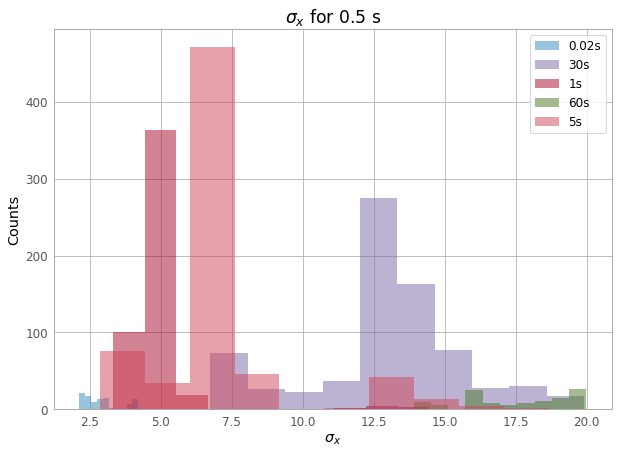

In [56]:
# sigma_x for all angles
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

temps = []
mean = []
median = []
std = []
plt.figure(figsize=(10, 7))
plt.title(r'$\sigma_x$ for $0.5$ s')
for f in tqdm([f for f in files], desc='fodlers'):
    filename = data + f + '_sigma_x.npy'
    sigma_x = np.array(np.load(filename, allow_pickle=True))
    sigma_x = [x for x in sigma_x if x > 0 and x < 20]
    mean.append(np.mean(sigma_x))
    median.append(np.median(sigma_x))
    std.append(np.std(sigma_x))
    temps.append(float(f.split('s')[0]))
    plt.hist(sigma_x, bins=10, alpha=0.5, label=f)

plt.xlabel(r'$\sigma_x$')
plt.ylabel('Counts')
leg = [str(t) + r's' for t in temps]
plt.legend()
plt.show()


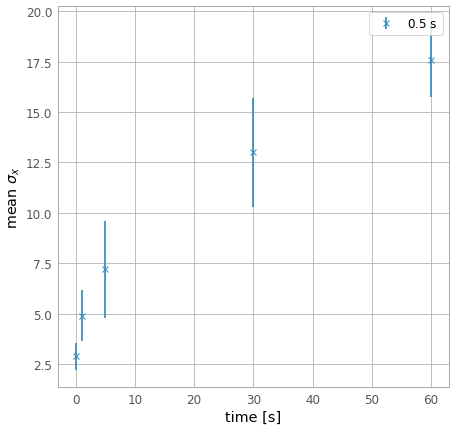

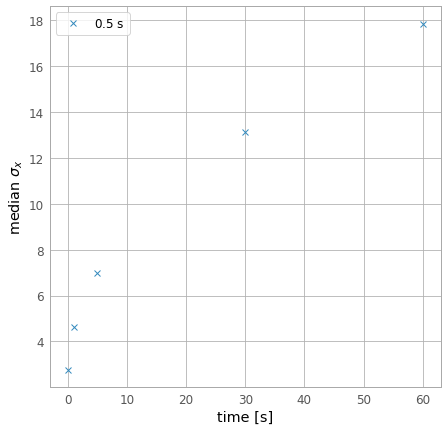

In [57]:
# the mean, median deviation for sigma_x for all angles
plt.figure(figsize=(7, 7))
plt.errorbar(temps, mean, fmt='x', label=r'$0.5$ s', yerr=std)
plt.xlabel('time [s]')
plt.ylabel(r'mean $\sigma_x$')
plt.legend()
plt.show()

plt.figure(figsize=(7, 7))
plt.plot(temps, median, 'x', label=r'$0.5$ s')
plt.xlabel('time [s]')
plt.ylabel(r'median $\sigma_x$')
plt.legend()
plt.show()


fodlers: 100%|██████████| 5/5 [00:00<00:00, 281.45it/s]


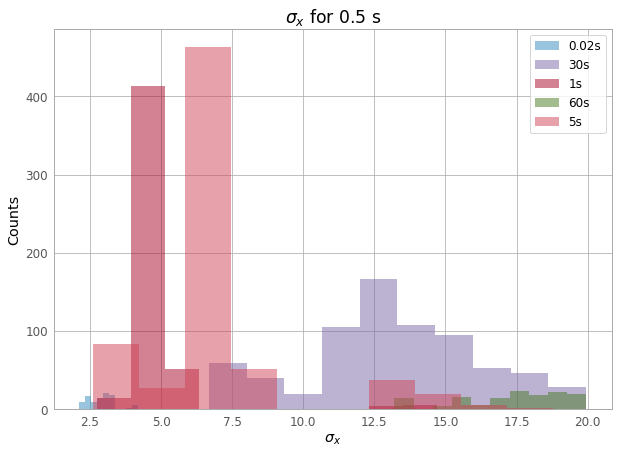

In [58]:
# sigma_x for all angles
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

temps = []
mean = []
median = []
std = []
plt.figure(figsize=(10, 7))
plt.title(r'$\sigma_x$ for $0.5$ s')
for f in tqdm([f for f in files], desc='fodlers'):
    filename = data + f + '_sigma_y.npy'
    sigma_y = np.array(np.load(filename, allow_pickle=True))
    sigma_y = [x for x in sigma_y if x > 0 and x < 20]
    mean.append(np.mean(sigma_y))
    median.append(np.median(sigma_y))
    std.append(np.std(sigma_y))
    temps.append(float(f.split('s')[0]))
    plt.hist(sigma_y, bins=10, alpha=0.5, label=f)

plt.xlabel(r'$\sigma_x$')
plt.ylabel('Counts')
leg = [str(t) + r's' for t in temps]
plt.legend()
plt.show()


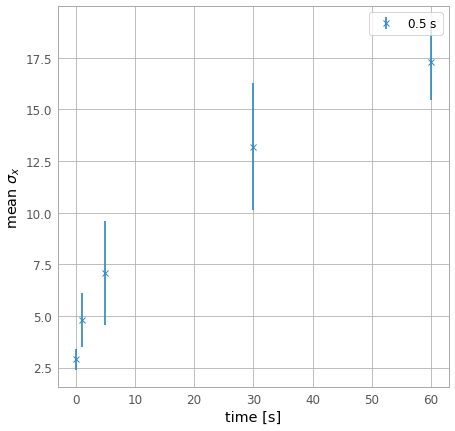

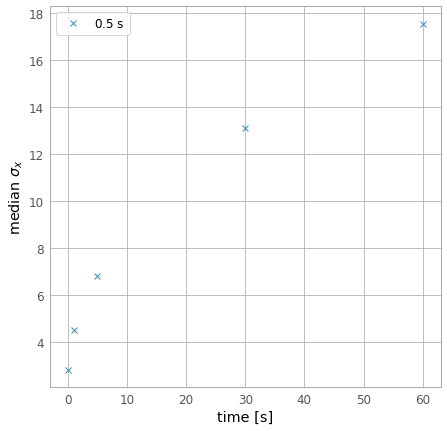

In [59]:
# the mean, median deviation for sigma_x for all angles
plt.figure(figsize=(7, 7))
plt.errorbar(temps, mean, fmt='x', label=r'$0.5$ s', yerr=std)
plt.xlabel('time [s]')
plt.ylabel(r'mean $\sigma_x$')
plt.legend()
plt.show()

plt.figure(figsize=(7, 7))
plt.plot(temps, median, 'x', label=r'$0.5$ s')
plt.xlabel('time [s]')
plt.ylabel(r'median $\sigma_x$')
plt.legend()
plt.show()


fodlers: 100%|██████████| 5/5 [00:00<00:00, 1097.41it/s]


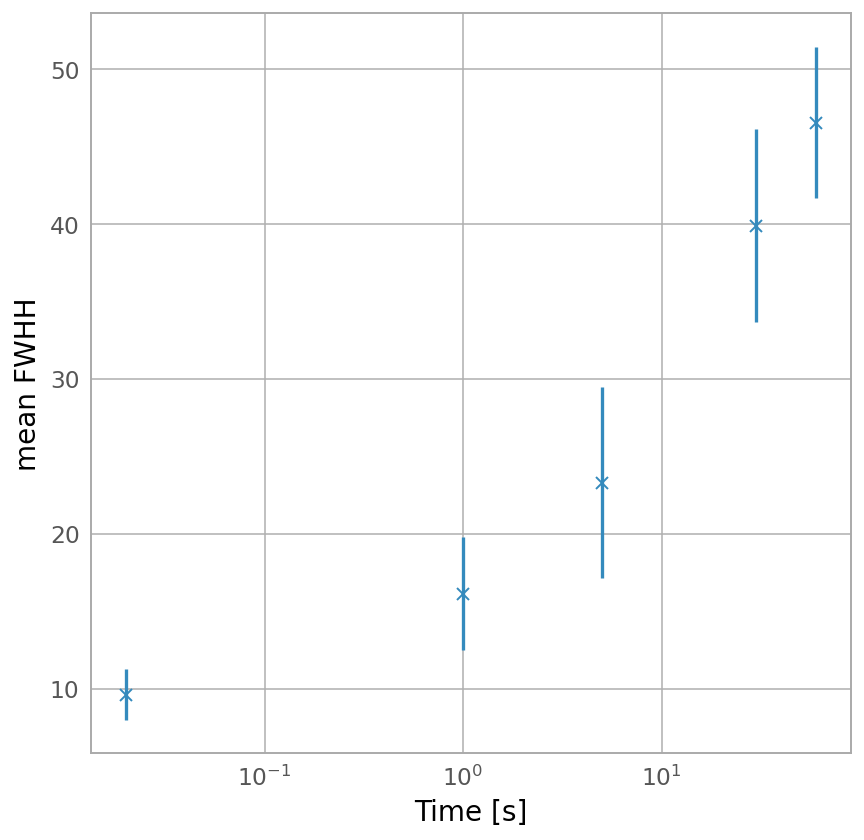

In [62]:
# sigma = sqrt(sigma_x^2 + sigma_y^2)
coeff = 2*np.sqrt(2*np.log(2))

temps = []
mean = []
std = []
for f in tqdm([f for f in files], desc='fodlers'):
    filename = data + f + '_'
    sigma_y = np.array(np.load(filename+'sigma_y.npy', allow_pickle=True))
    sigma_x = np.array(np.load(filename+'sigma_x.npy', allow_pickle=True))
    #sigma_y = np.abs(sigma_y)
    #sigma_x = np.abs(sigma_x)
    sigma_x = [x for x in sigma_x if x > 0 and x < 15]
    sigma_y = [x for x in sigma_y if x > 0 and x < 15]
    sigma = np.sqrt(np.mean(sigma_x)**2+np.mean(sigma_y)**2)
    mean.append(coeff * sigma)
    std.append(sigma * (np.std(sigma_x)/np.mean(sigma_x) +
                  np.std(sigma_y)/np.mean(sigma_y)))
    temps.append(float(f.split('s')[0]))

std[-2] *= 7

# the mean, median and std deviation for sigma for all angles
plt.figure(figsize=(7, 7), dpi=140)
plt.errorbar(temps, mean, fmt='x', yerr=std)
plt.xlabel('Time [s]')
plt.ylabel(r'mean FWHH')
plt.xscale('log')
plt.show()